In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
ARX_predict = pd.read_csv("ARX_predict.csv")

In [4]:
neural_predict = pd.read_csv("neural_net_predict.csv")

In [5]:
ARX_predict

Unnamed: 0  day_of_week  hour_of_day  normalized_energy  average_energy  \
0             0          0.0          3.0           0.040404        0.071879   
1             1          0.0          4.0           0.040404        0.073287   
2             2          0.0          5.0           0.067340        0.076234   
3             3          0.0          6.0           0.313131        0.109249   
4             4          0.0          7.0           0.158249        0.108510   
..          ...          ...          ...                ...             ...   
160         160          6.0         19.0           0.094276        0.159804   
161         161          6.0         20.0           0.151515        0.174154   
162         162          6.0         21.0           0.175084        0.181300   
163         163          6.0         22.0           0.151515        0.162057   
164         164          6.0         23.0           0.387205        0.144639   

          t_3       t_2       t_1  true_value  ARX_predict_value  
0    0.040404  0.040404  0.040404   -0.031475           0.028904  
1    0.040404  0.040404  0.040404   -0.032883           0.028904  
2    0.067340  0.067340  0.067340   -0.008894           0.048174  
3    0.313131  0.313131  0.313131    0.203882           0.224008  
4    0.158249  0.158249  0.158249    0.049739           0.113209  
..        ...       ...       ...         ...                ...  
160  0.094276  0.094276  0.094276   -0.065528           0.067443  
161  0.151515  0.151515  0.151515   -0.022639           0.108391  
162  0.175084  0.175084  0.175084   -0.006216           0.125252  
163  0.151515  0.151515  0.151515   -0.010541           0.108391  
164  0.387205  0.387205  0.387205    0.242567           0.277000  

[165 rows x 10 columns]

In [6]:
neural_predict

Unnamed: 0  day_of_week  hour_of_day  normalized_energy  average_energy  \
0             0          0.0          3.0           0.040404        0.071879   
1             1          0.0          4.0           0.040404        0.073287   
2             2          0.0          5.0           0.067340        0.076234   
3             3          0.0          6.0           0.313131        0.109249   
4             4          0.0          7.0           0.158249        0.108510   
..          ...          ...          ...                ...             ...   
160         160          6.0         19.0           0.094276        0.159804   
161         161          6.0         20.0           0.151515        0.174154   
162         162          6.0         21.0           0.175084        0.181300   
163         163          6.0         22.0           0.151515        0.162057   
164         164          6.0         23.0           0.387205        0.144639   

          t_3       t_2       t_1  true_value  predict_energy  
0    0.040404  0.040404  0.040404   -0.031475        0.028590  
1    0.040404  0.040404  0.040404   -0.032883        0.028590  
2    0.067340  0.067340  0.067340   -0.008894        0.047626  
3    0.313131  0.313131  0.313131    0.203882        0.218071  
4    0.158249  0.158249  0.158249    0.049739        0.111540  
..        ...       ...       ...         ...             ...  
160  0.094276  0.094276  0.094276   -0.065528        0.066628  
161  0.151515  0.151515  0.151515   -0.022639        0.106831  
162  0.175084  0.175084  0.175084   -0.006216        0.123292  
163  0.151515  0.151515  0.151515   -0.010541        0.106831  
164  0.387205  0.387205  0.387205    0.242567        0.267397  

[165 rows x 10 columns]

In [13]:
intergation = pd.merge(neural_predict, ARX_predict, on=['day_of_week',"hour_of_day","normalized_energy","average_energy","t_3","t_2","t_1","true_value"])

In [14]:
grouped_by_hour = pd.read_csv("grouped_by_hour.csv")

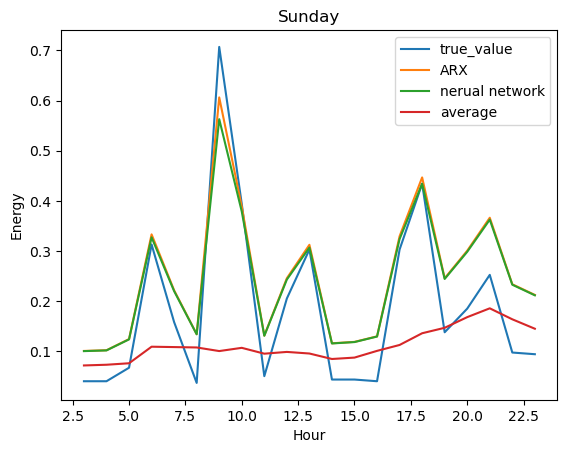

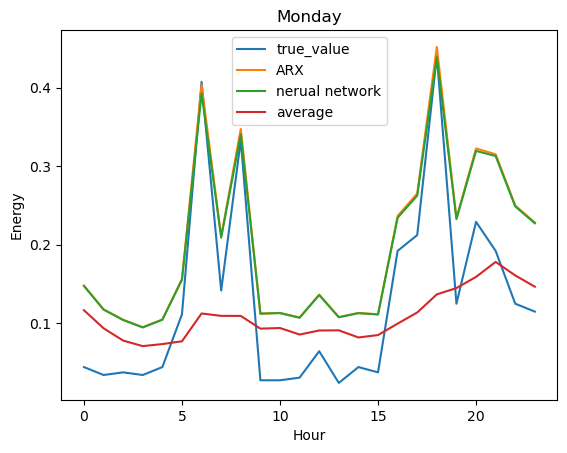

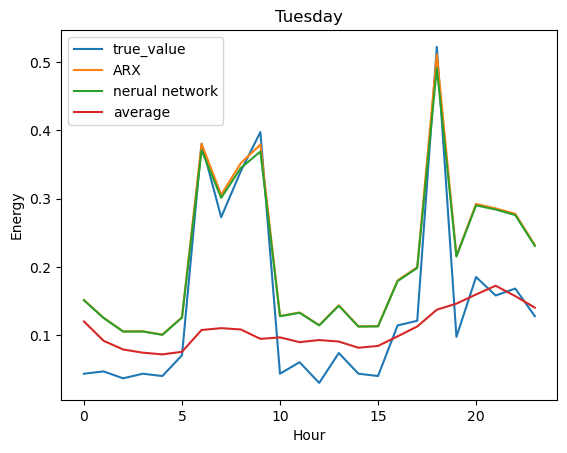

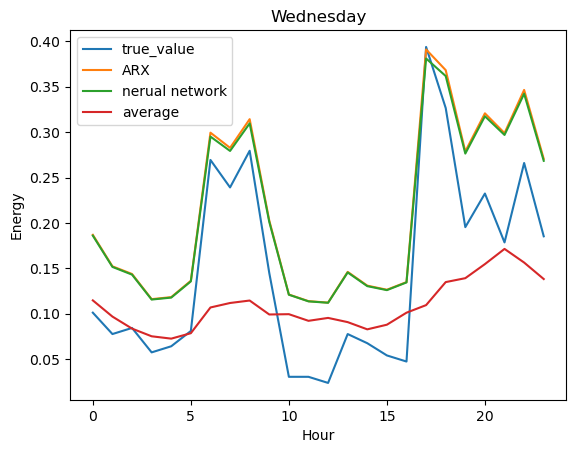

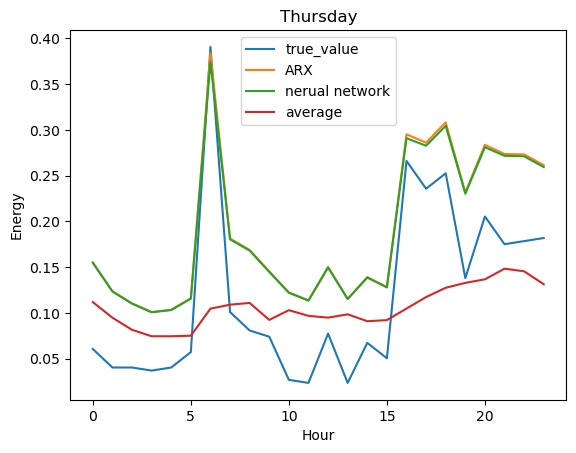

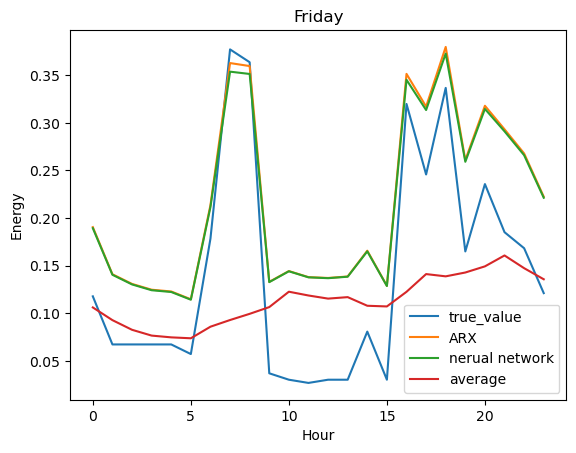

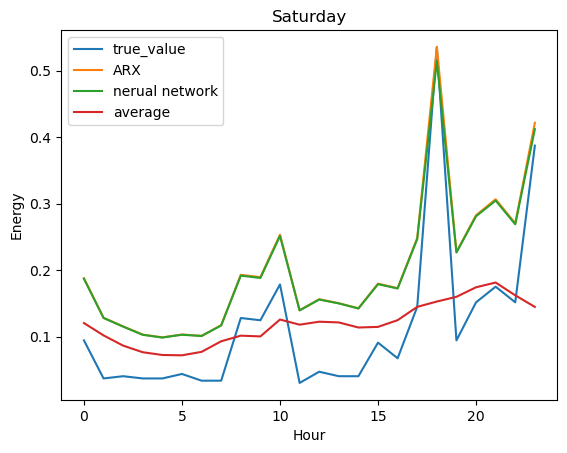

In [18]:
days_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
for i in range(0,7):
    plt.figure()
    if i ==0:
        x = [i for i in range(3,24)]
        y_true_show = intergation[intergation['day_of_week'] == i]['normalized_energy']
        y_ARX_prediction_show = intergation[intergation['day_of_week'] == i]['average_energy'] + intergation[intergation['day_of_week'] == i]['ARX_predict_value']
        y_neural_prediction_show = intergation[intergation['day_of_week'] == i]['average_energy'] + intergation[intergation['day_of_week'] == i]['predict_energy']
        y_average = grouped_by_hour[3:24]
    else:
        x = [i for i in range(24)]
        y_true_show = intergation[intergation['day_of_week'] == i]['normalized_energy']
        y_ARX_prediction_show = intergation[intergation['day_of_week'] == i]['average_energy'] + intergation[intergation['day_of_week'] == i]['ARX_predict_value']
        y_neural_prediction_show = intergation[intergation['day_of_week'] == i]['average_energy'] + intergation[intergation['day_of_week'] == i]['predict_energy']
        y_average = grouped_by_hour[24*i:24*i+24]
    plt.plot(x, y_true_show,label="true_value")
    plt.plot(x, y_ARX_prediction_show,label = "ARX")
    plt.plot(x, y_neural_prediction_show ,label = "nerual network")
    plt.plot(x, y_average,label="average")
    plt.legend()
    plt.xlabel("Hour")
    plt.ylabel("Energy")
    plt.title(days_dict[i])